In [29]:
import os
import numpy as np
from sklearn import linear_model
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Very simple graph

`tensorboard --logdir=/tmp/tensorflow/00_tensorboard/logs`

In [12]:
logdir='/tmp/tensorflow/00_tensorboard/logs'
if os.path.exists(logdir):
    os.system('rm -rf {}'.format(logdir))

with tf.Graph().as_default() as graph:
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.add(a, b, name='c')

with tf.Session(graph=graph) as sess:    
    train_writer = tf.summary.FileWriter(logdir, graph)
    c_out = sess.run(c)

In [13]:
c_out

3

# Linear Regression

In [27]:
# Create mock data, solve an sklearn linear model
Nsamp = 50
Nfeatures = 1
xarr = np.linspace(-0.5, 0.5, Nsamp)
np.random.seed(83749)
beta_0 = -2.0
beta_1 = 4.3
yarr = (beta_0 + beta_1 * xarr) + (np.random.normal(size=Nsamp) * 0.5)

mdl = linear_model.LinearRegression(fit_intercept=False)
mdl = mdl.fit(np.c_[np.ones(Nsamp), xarr], yarr)
mdl.coef_

array([-2.0517912 ,  4.08511933])

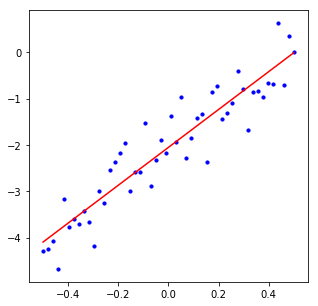

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(xarr, yarr, s=10, color='blue')
plt.plot(xarr, mdl.coef_[0] + mdl.coef_[1] * xarr, color='red')

In [49]:
logdir='/tmp/tensorflow/00_tensorboard/logs'
if os.path.exists(logdir):
    print('removing logdir')
    os.system('rm -rf {}'.format(logdir))

with tf.Graph().as_default() as graph:

    Nfeatures=1
    X = tf.placeholder(tf.float32, [None, Nfeatures], name='X')
    y = tf.placeholder(tf.float32, [None, 1], name='y')

    with tf.name_scope('logit'):
        W = tf.Variable(tf.random_normal([Nfeatures, 1]), name='W')
        b = tf.Variable(tf.zeros([1]), name='b')
        z = tf.matmul(X, W) + b
        
        tf.summary.histogram('weights', W)
        tf.summary.histogram('biases', b)
        tf.summary.histogram('z', z)
            
    with tf.name_scope('mse'):
        loss = tf.reduce_mean(tf.squared_difference(z, y), name='loss')
        tf.summary.scalar('loss', loss)
        
    with tf.name_scope('train'):
        learning_rate = 0.1
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    merged_summary = tf.summary.merge_all()
    
feed_dict = {X: xarr.reshape(Nsamp, 1), y: yarr.reshape(Nsamp,1)}
with tf.Session(graph=graph) as sess:    
    
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter(logdir)
    file_writer.add_graph(graph)
        
    for i in range(300):
        train_step_out = sess.run(train_step, feed_dict=feed_dict)
        loss_out = sess.run(loss, feed_dict=feed_dict)    
        print(i, loss_out)
        s = sess.run(merged_summary, feed_dict=feed_dict)
        file_writer.add_summary(s, i)
        
    W_out = sess.run(W, feed_dict=feed_dict)
    b_out = sess.run(b, feed_dict=feed_dict)
    
print('W_out: ', W_out)
print('b_out: ', b_out)

removing logdir
0 4.59302
1 3.56539
2 2.88893
3 2.43786
4 2.13167
5 1.9188
6 1.76623
7 1.65283
8 1.56502
9 1.49413
10 1.43456
11 1.38274
12 1.33633
13 1.29385
14 1.25433
15 1.21712
16 1.1818
17 1.14808
18 1.11578
19 1.08474
20 1.05488
21 1.02611
22 0.998368
23 0.971609
24 0.945787
25 0.920865
26 0.896807
27 0.873581
28 0.851156
29 0.829505
30 0.808599
31 0.788413
32 0.768922
33 0.750102
34 0.731929
35 0.714381
36 0.697437
37 0.681076
38 0.665277
39 0.650022
40 0.635291
41 0.621067
42 0.607333
43 0.59407
44 0.581264
45 0.568898
46 0.556958
47 0.545428
48 0.534295
49 0.523545
50 0.513164
51 0.503141
52 0.493462
53 0.484116
54 0.475091
55 0.466377
56 0.457963
57 0.449838
58 0.441992
59 0.434416
60 0.427101
61 0.420038
62 0.413217
63 0.406631
64 0.400271
65 0.39413
66 0.388201
67 0.382475
68 0.376946
69 0.371608
70 0.366453
71 0.361475
72 0.356668
73 0.352027
74 0.347546
75 0.343218
76 0.339039
77 0.335004
78 0.331108
79 0.327346
80 0.323713
81 0.320206
82 0.316818
83 0.313548
84 0.31039
8

In [34]:
tf.global_variables_initializer?


In [ ]:



with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('/tmp/tensorflow/logs', sess.graph)
    
    sess.run(init)
    z_out = sess.run(v_z, feed_dict=feed_dict)
    cost_1_out = sess.run(cost_1, feed_dict=feed_dict)
    cost_2_out = sess.run(cost_2, feed_dict=feed_dict)
    for i in range(300):
        train_step_out = sess.run(train_step, feed_dict=feed_dict)
    W_out = sess.run(v_W, feed_dict=feed_dict)
    b_out = sess.run(v_b, feed_dict=feed_dict)

print(W_out)
print(b_out)
